In [1]:
import mnist_decoder as md
from helper import *
import numpy as np

from sklearn import svm
import pickle

import random

In [2]:
train_images_ = md.get_images("../data/train-images-idx3-ubyte.gz")
train_labels_ = md.get_labels("../data/train-labels-idx1-ubyte.gz")
test_images_ = md.get_images("../data/t10k-images-idx3-ubyte.gz")
test_labels_ = md.get_labels("../data/t10k-labels-idx1-ubyte.gz")

In [3]:
random.seed(20220319)
sp_idx_train = random.sample(range(60000), 6000)
sp_idx_test = random.sample(range(10000), 1000)

In [4]:
# subset
train_images = train_images_[sp_idx_train]
train_labels = train_labels_[sp_idx_train]
test_images = test_images_[sp_idx_test]
test_labels = test_labels_[sp_idx_test]

In [5]:
train_X, train_y = image_to_feature(train_images, train_labels)
test_X, test_y = image_to_feature(test_images, test_labels)

In [14]:
train_images.shape

(6000, 28, 28)

In [18]:
train_images[0,:,:].reshape(784)

array([  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   

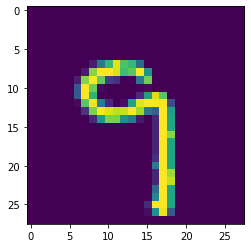

In [16]:
plt.imshow(train_images[2,:,:])

### check if the classes are balanced

In [8]:
ys = {}

for y in test_y:
    ys[y] = ys.get(y, 0) + 1

In [9]:
ys

{5.0: 92,
 2.0: 102,
 0.0: 91,
 6.0: 104,
 4.0: 89,
 8.0: 97,
 9.0: 114,
 3.0: 106,
 7.0: 90,
 1.0: 115}

### fit the model

In [10]:
clf = svm.SVC(decision_function_shape='ovr')

In [11]:
clf.fit(train_X, train_y)

SVC()

In [12]:
clf.score(test_X, test_y)

0.346

### save the fitted model

In [ ]:
file_save_clf = open('default_parameter_svm.obj', 'wb')

In [ ]:
pickle.dump(clf, file_save_clf)